In [22]:
%run ExoTides_analytic.ipynb # load functions

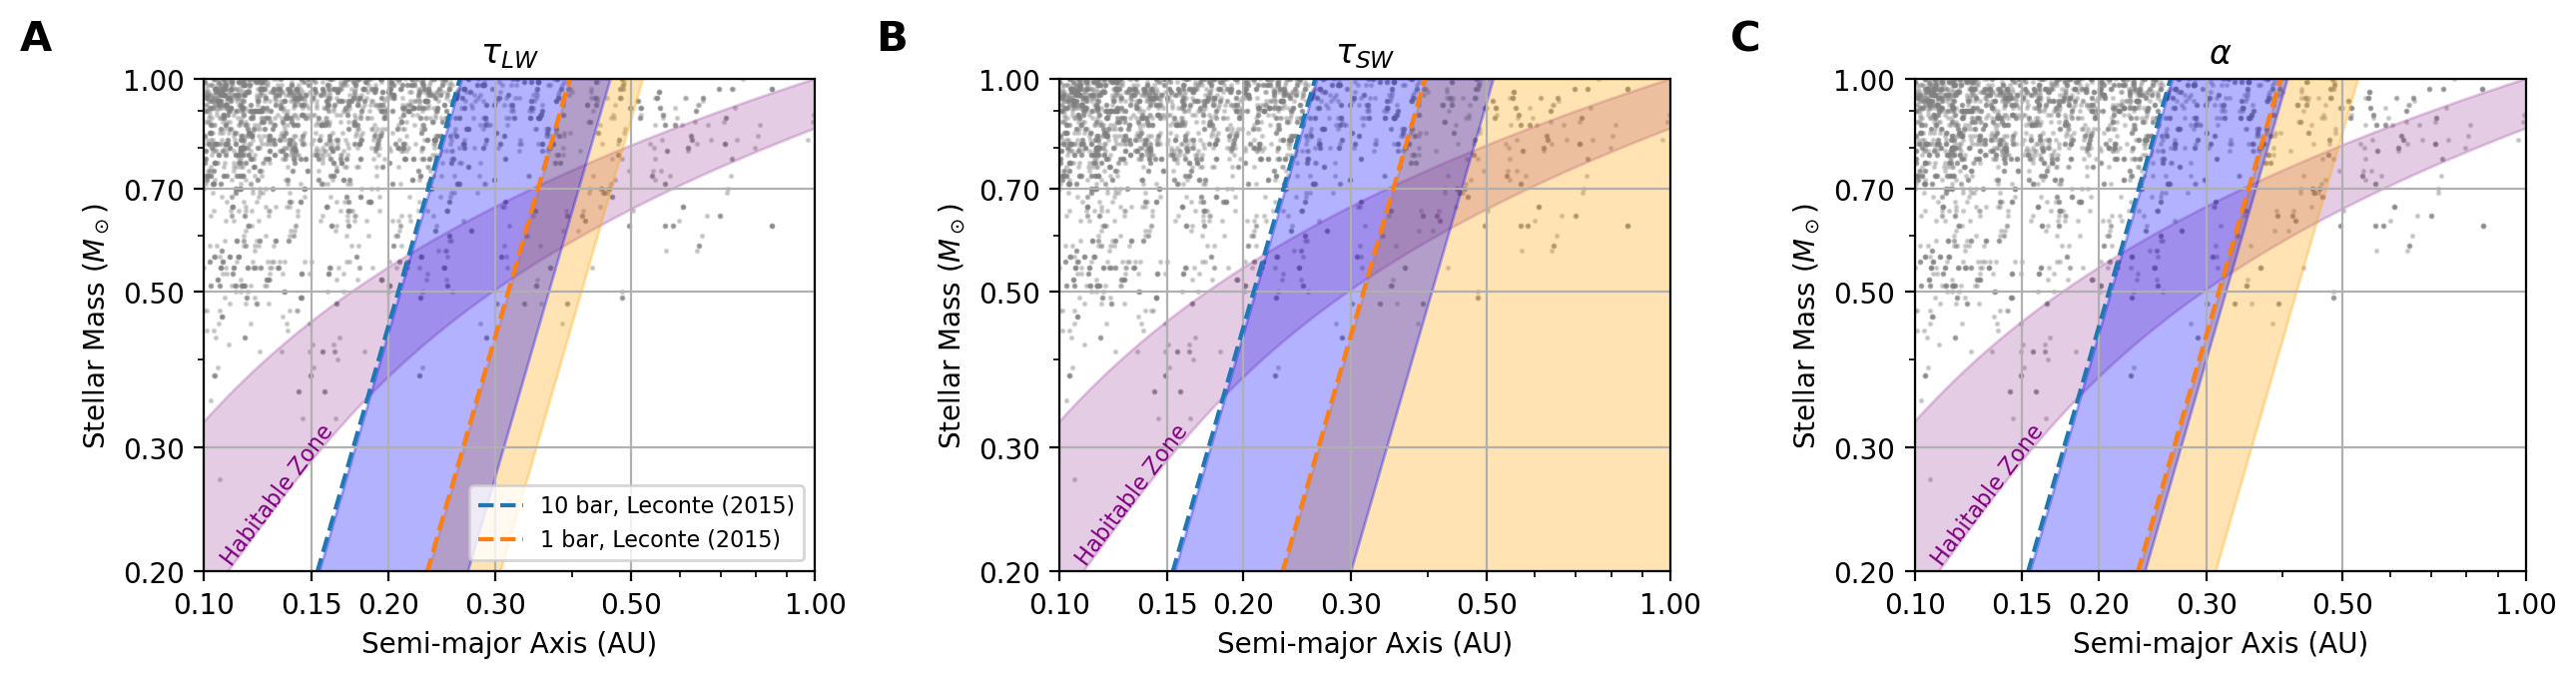

In [25]:
from matplotlib.ticker import StrMethodFormatter, NullFormatter
exo = np.loadtxt('../nasa_exoplanet.csv',skiprows=103, usecols=(15,59), delimiter=',')
fig, ax = plt.subplots(1,3,figsize=(13,3.5), dpi=200,tight_layout=True)
M_star_list = np.linspace(0.1,1,100)
mu_star = np.log10(M_star_list)
L_star = L_sun*10**(4.101*mu_star**3 + 8.162*mu_star**2 + 7.108*mu_star)
a_inner = np.sqrt(L_star/(4*np.pi*1366))
a_outer = np.sqrt(L_star/(4*np.pi*472))
S_fig7 = 1366
tau_sw_base_1bar = 0.58
tau_sw_base_10bar = 0.5
alpha_plot = 0.3

for axes in ax:
    axes.scatter(exo[:,0], exo[:,1], color ='grey',alpha=0.3, s=1)
    axes.fill_betweenx(M_star_list, a_inner/AU, a_outer/AU, alpha=0.2, color = 'purple')
    axes.plot(critical_semimajor_leconte(M_star_list*M_sun, R_E, 10*bar, 90, 100, k2), M_star_list, '--',label = '10 bar, Leconte (2015)')
    axes.plot(critical_semimajor_leconte(M_star_list*M_sun, R_E, 1*bar, 90, 100, k2), M_star_list, '--',label = '1 bar, Leconte (2015)')
    axes.set_ylabel('Stellar Mass ($M_\\odot$)')
    axes.set_xlabel('Semi-major Axis (AU)')
    axes.text(0.105,0.205, 'Habitable Zone', color='purple', rotation=53, fontsize=8)

    
ax[0].text(0.05, 1.1, 'A', fontweight='bold', fontsize=15)
ax[1].text(0.05, 1.1, 'B', fontweight='bold', fontsize=15)
ax[2].text(0.05, 1.1, 'C', fontweight='bold', fontsize=15)

ax[0].set_title('$\\tau_{LW}$')

ax[0].fill_betweenx(M_star_list, critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_1bar, 10, 1*bar, 90, 100, k2), critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_1bar, 1, 1*bar, 90, 100, k2), alpha=alpha_plot, color = 'orange')
ax[0].fill_betweenx(M_star_list, critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_10bar, 50, 10*bar, 90, 100, k2), critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_10bar, 5, 10*bar, 90, 100, k2), alpha=alpha_plot, color = 'blue')


ax[0].legend(fontsize=8)

ax[1].set_title('$\\tau_{SW}$')

ax[1].fill_betweenx(M_star_list, critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, 2, 1, 1*bar, 90, 100, k2), critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_1bar, 1, 1*bar, 90, 100, k2), alpha=alpha_plot, color = 'orange')

ax[1].fill_betweenx(M_star_list, critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, 2, 10, 10*bar, 90, 100, k2), critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_10bar, 5, 10*bar, 90, 100, k2), alpha=alpha_plot, color = 'blue')

ax[2].set_title('$\\alpha$')

ax[2].fill_betweenx(M_star_list, critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.9, tau_sw_base_1bar, 1, 1*bar, 90, 100, k2), critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_1bar, 1, 1*bar, 90, 100, k2), alpha=alpha_plot, color = 'orange')

ax[2].fill_betweenx(M_star_list, critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.9, tau_sw_base_10bar, 10, 10*bar, 90, 100, k2), critical_semimajor(S_fig7,M_star_list*M_sun, R_E, 0.2, tau_sw_base_10bar, 5, 10*bar, 90, 100, k2), alpha=alpha_plot, color = 'blue')





from matplotlib.ticker import StrMethodFormatter, NullFormatter

for axes in ax:
    axes.set_yscale('log')
    axes.set_xscale('log')
    axes.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
    axes.xaxis.set_minor_formatter(NullFormatter())
    axes.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
    axes.yaxis.set_minor_formatter(NullFormatter())
    axes.set_xticks([0.1, 0.15, 0.2, 0.3, 0.5, 1.0])
    axes.set_yticks([0.2, 0.3, 0.5, 0.7, 1.0])
    axes.set_xlim(0.1,1)
    axes.set_ylim(0.2,1.)
    axes.grid()
plt.savefig('./Paper Plots/SW_2024_Figure7.pdf', bbox_inches='tight')